In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data = pd.read_csv('./nba-shot-logs/shot_logs.csv')
features = ['DRIBBLES','TOUCH_TIME','SHOT_DIST','PTS_TYPE']
data_features = data[features].head(1000)
data_y=data['PTS'].head(1000)
data_x=data_features
print(data_x)

     DRIBBLES  TOUCH_TIME  SHOT_DIST  PTS_TYPE
0           2         1.9        7.7         2
1           0         0.8       28.2         3
2           3         2.7       10.1         2
3           2         1.9       17.2         2
4           2         2.7        3.7         2
5           2         4.4       18.4         2
6          11         9.0       20.7         2
7           3         2.5        3.5         2
8           0         0.8       24.6         3
9           0         1.1       22.4         3
10          8         7.5       24.5         3
11         14        11.9       14.6         2
12          2         2.9        5.9         2
13          0         0.8       26.4         3
14          0         0.5       22.8         3
15          3         2.7       24.7         3
16          6         5.1       25.0         3
17          1         0.9       25.6         3
18          0         1.2       24.2         3
19          2         2.2       25.4         3
20          5

In [26]:
data.shape

(128069, 21)

In [14]:
add=np.zeros((data_features.shape[0],1))
for i in range(0,data_features.shape[0]):
    add[i,0]=1
    
data_feature_intercept=np.column_stack((add, data_x))

In [15]:

data_y[data_y!=0]=1    

data_y=np.mat(data_y).T
data_x=data_feature_intercept

In [16]:
def sigmoid(x,coe):
    sigmoid=1/(1+np.exp(-(x.dot(coe))))
    return sigmoid

In [17]:
def cost(X,y,coe,lamb):
    cost1=-y.T.dot(np.log(sigmoid(X,coe))) - (1-y).T.dot(np.log(1-(sigmoid(X,coe))))
    cost2=lamb*coe.T.dot(coe)/(2*len(X))
    cost=(1/len(X))*cost1+cost2
    print(cost)
    return cost[0,0] 

In [18]:
def gradient(X,y,coe,lamb):
    e=np.empty([len(X),1])
    for i in range (0,len(X)):
        e[i]=sigmoid(X[i],coe)
    coe2=coe.copy()
    gradient=(e-y).T.dot(X)+(lamb/len(X))*coe2.T
    return gradient

In [19]:
def graddec(X,y,coe,lamb,alpha=0.0001,iterations=615):
    cost_list=[cost(X,y,coe,lamb)]
    for i in range(0,iterations):
        coe=coe-alpha*gradient(X,y,coe,lamb).T
        new_cost=cost(X,y,coe,lamb)
        cost_list.append(new_cost)
    return (coe,cost_list)  

In [20]:
lamb=1
X=data_x
y=data_y
coe=-1*np.ones(([len(X.T),1]))
(coe,cost_list) = graddec(X,y,coe,lamb,alpha=0.00001,iterations=1000)


[[8.20240535]]
[[7.93527321]]
[[7.6681584]]
[[7.40106344]]
[[7.13399141]]
[[6.86694609]]
[[6.59993213]]
[[6.33295536]]
[[6.0660231]]
[[5.79914469]]
[[5.53233215]]
[[5.26560122]]
[[4.99897287]]
[[4.73247575]]
[[4.46615055]]
[[4.20005805]]
[[3.93429584]]
[[3.6690353]]
[[3.40460883]]
[[3.14172578]]
[[2.88202206]]
[[2.62943869]]
[[2.39323155]]
[[2.19150828]]
[[2.04502235]]
[[1.95528114]]
[[1.90292459]]
[[1.8697425]]
[[1.8458667]]
[[1.82662538]]
[[1.80979048]]
[[1.79425604]]
[[1.77945082]]
[[1.76507026]]
[[1.75094819]]
[[1.73699262]]
[[1.72315215]]
[[1.70939803]]
[[1.69571432]]
[[1.68209233]]
[[1.66852752]]
[[1.65501775]]
[[1.64156225]]
[[1.62816106]]
[[1.61481465]]
[[1.60152381]]
[[1.58828947]]
[[1.57511265]]
[[1.56199448]]
[[1.54893612]]
[[1.53593875]]
[[1.52300361]]
[[1.51013197]]
[[1.4973251]]
[[1.48458433]]
[[1.47191099]]
[[1.45930645]]
[[1.44677209]]
[[1.43430934]]
[[1.42191964]]
[[1.40960445]]
[[1.39736526]]
[[1.38520359]]
[[1.37312098]]
[[1.361119]]
[[1.34919922]]
[[1.33736327]]
[[1

[[0.69395673]]
[[0.69388548]]
[[0.69381445]]
[[0.69374366]]
[[0.6936731]]
[[0.69360276]]
[[0.69353266]]
[[0.69346278]]
[[0.69339312]]
[[0.69332369]]
[[0.69325449]]
[[0.69318551]]
[[0.69311675]]
[[0.69304821]]
[[0.69297989]]
[[0.69291179]]
[[0.69284392]]
[[0.69277626]]
[[0.69270882]]
[[0.69264159]]
[[0.69257459]]
[[0.69250779]]
[[0.69244122]]
[[0.69237485]]
[[0.6923087]]
[[0.69224276]]
[[0.69217704]]
[[0.69211152]]
[[0.69204622]]
[[0.69198112]]
[[0.69191623]]
[[0.69185156]]
[[0.69178708]]
[[0.69172282]]
[[0.69165876]]
[[0.6915949]]
[[0.69153125]]
[[0.69146781]]
[[0.69140456]]
[[0.69134152]]
[[0.69127868]]
[[0.69121604]]
[[0.6911536]]
[[0.69109136]]
[[0.69102932]]
[[0.69096747]]
[[0.69090583]]
[[0.69084438]]
[[0.69078312]]
[[0.69072207]]
[[0.6906612]]
[[0.69060053]]
[[0.69054005]]
[[0.69047977]]
[[0.69041968]]
[[0.69035978]]
[[0.69030006]]
[[0.69024054]]
[[0.69018121]]
[[0.69012207]]
[[0.69006311]]
[[0.69000434]]
[[0.68994576]]
[[0.68988737]]
[[0.68982916]]
[[0.68977113]]
[[0.68971329]]


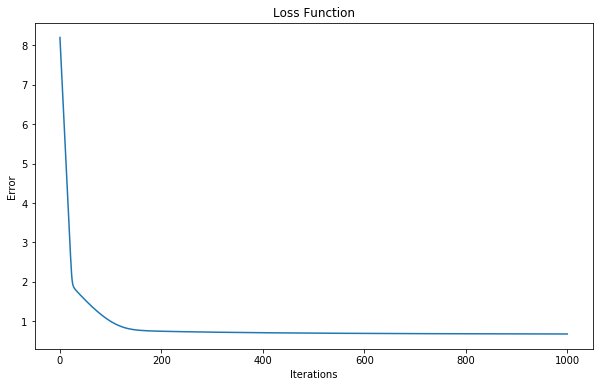

In [21]:
plt.figure(figsize=[10,6])
plt.plot(range(len(cost_list)),cost_list)
plt.title('Loss Function')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.show()

In [22]:
data_test_x=np.mat(data[features])[-100:-1,:]
data_test_y=np.mat(data['PTS'])[:,-100:-1].T
data_test_y[data_test_y!=0]=1  
add2=np.zeros(([data_test_x.shape[0],1]))
for i in range(0,data_test_x.shape[0]):
    add2[i,0]=1
data_test_x=np.column_stack((add2, data_test_x))  
test_error=cost(data_test_x,data_test_y,coe,lamb)


[[0.67508344]]


In [25]:
predict_y=np.zeros(([len(data_test_y),1]))
for i in range(0,len(data_test_y)):
    if sigmoid(data_test_x[i],coe)>0.5:
        predict_y[i]=1
    else:
        predict_y[i]=0
correct=0
for i in range(0,len(data_test_y)):
    if predict_y[i]==data_test_y[i]:
        correct=correct+1
    else:
        correct=correct
test_accuracy=correct/len(data_test_y)
print('test_accuracy=',test_accuracy)

test_accuracy= 0.5757575757575758
